In [2]:
# Imports

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error # For comparisson between lines plotted, usage up for discussion.

### Import and Optimiza Data

UN WPP has 2 different sets of data listed on their CSV downloads, which can be found if the `./data/` path. For this project the `./data/data_Medium.csv` is used to derive analytics and visualizations. Below, you can find the code related to import and optimization of dtypes for said data file.  

In [115]:
# Read data from .parquet file
df = pd.read_parquet('./data/data_Medium.parquet')

df.set_index(df['Time'], inplace=True)
# Inspect dtypes
# df.info(memory_usage='deep')

# Check if reserved bits can be reduced for any columns of type int64

int_cols = df.select_dtypes(include='int64')
for col in int_cols.columns:
    
    if (df[col].max() < 32767):
        df[col] = df[col].astype('int16')

# Set 'Time' as type datetime64[ns]
df['Time'] = pd.to_datetime(df['Time'], format='%Y') # format = '%Y' is the only matching format for the dataset.


# df.info(memory_usage='deep') for comparrison

### Growth Rate Visualization

Projections were made for multiple grouping formats such as geographic, development based and income level based. Data plotted below uses the SDG (Sustainable Development Goals) as its divider. This grouping categorizes regions by the SDG's assosiated with them which, in turn, means that the countries of  the same SDG region should share similar policies when it comes to population.

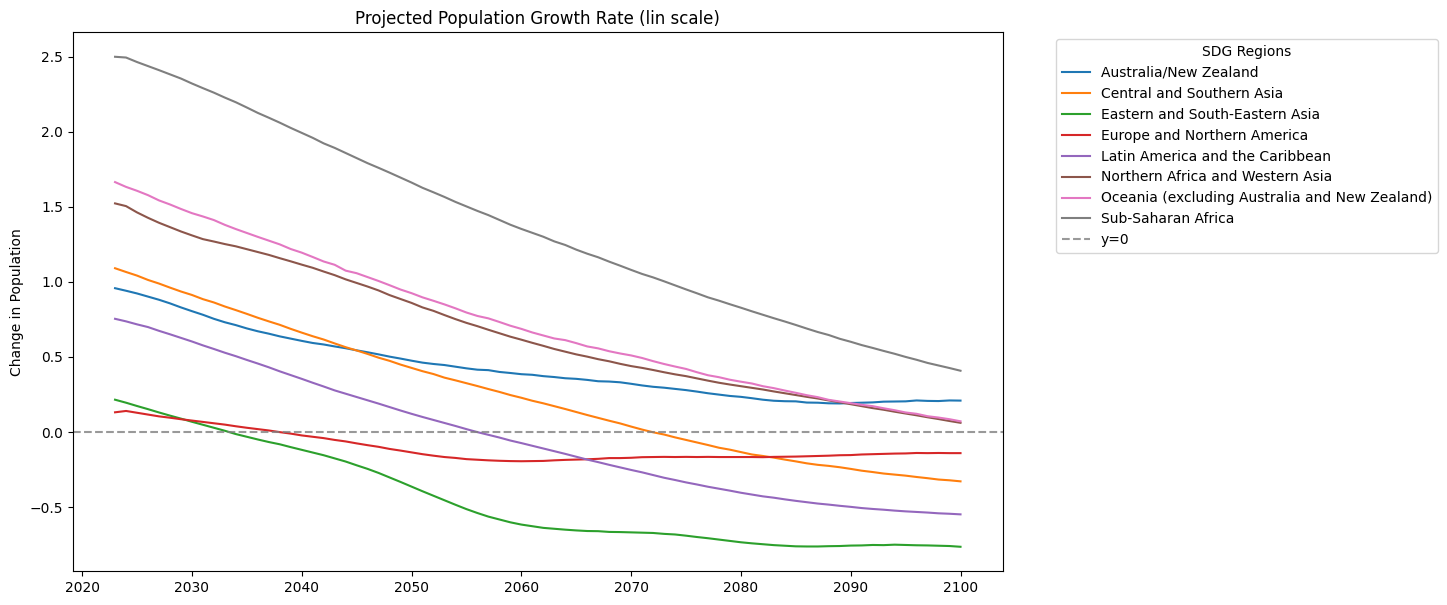

<Figure size 640x480 with 0 Axes>

In [134]:
# Filter to exclude historical data
df_projections = df.loc[(df['Time'] < '2101-01-10') & (df['Time'] > '2022-01-01')]

# Group data for SDG Regions by their locations
gr = df_projections.loc[df_projections['LocTypeName'] == 'SDG region',:].groupby(by='Location') 

# Create and configure plot with the prepared data
plt.figure(figsize=(12,7))

for loc, data in gr:
    plt.plot(data.index ,data['PopGrowthRate'], label=f'{loc}')
    
plt.axhline(0, color='grey', linestyle='dashed', label='y=0', alpha=0.8)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='SDG Regions')


plt.ylabel('Change in Population')
plt.title('Projected Population Growth Rate (lin scale)')
plt.show()
plt.clf()

### Potential conclusions from data

#### Negative growth rates

Projections made by the UN are broadly in line with the intuitive assumptions one would make about this subject. However, there is an important observation to make from this data. 
As the plot above displays, four regions are to fall below 0% growth and stay negative for the projected duration. Reduction of the global population is most probably going to become a necessity. This is visible in current observations and research conducted. It is a pertinent but commonly known issue, albeit the projected timing of this negative growth for some regions is closer than one may intuitively assume.

In [138]:
negGrowth = {loc: np.datetime_as_string(data[data['PopGrowthRate'] <= 0]['Time'].values[0], unit='Y') if not data[data['PopGrowthRate'] <= 0].empty else 'N/A' for loc, data in gr}  

df_negGrowth = pd.DataFrame(list(negGrowth.items()), columns=['region', 'negative_growth_beginning'])
df_negGrowth

,region,negative_growth_beginning
0,Australia/New Zealand,N/A
1,Central and Southern Asia,2072
2,Eastern and South-Eastern Asia,2034
3,Europe and Northern America,2038
4,Latin America and the Caribbean,2056
5,Northern Africa and Western Asia,N/A
6,Oceania (excluding Australia and New Zealand),N/A
7,Sub-Saharan Africa,N/A


By 2034, "Eastern and South-Eeastern Asia" is expected to see a reduced population. We know overpopulation is a pressing matter in the region; 2034 is ultimately a projection within expectations. The issue is acknowledged and policies are in place to have growth contained. The projection model rightfully expects the earliest conversion to negative growth from this region.

"Central and Southern Asia", despite not being overpopulated to the extent of 'Eastern and South-Eastern Asia' has been experiencing a steady slowdown in its population growth. When looking at the countries included in this region, we can see the outlier that is India. On a regional basis, 2072 is a sensible projection. On the other hand, India is a profusely overpopulated country. By being included in the region, India itself may be creating the expectation of a negative growth rate. The emergence of population-related problems in Pakistan and Bangladesh is a possibility, which may also influence the projection model. Despite that, the remaining Southern Asia countries are relatively sparse in population, more so for Central Asia.

"Latin America and the Caribbean" consists of many small countries by land area and population. A lack of land area, though it may seem unrelated, can create herculean problems in sustainability. As dictated by the economies of scale, the operation of such small countries becomes a colossal problem. Said countries are easily affected by changes in external economies and commonly have net negative migrations. Subsequently, Multiple countries with reduced populations already exist in the region. Consequently, 2056 is an agreeable projection for this region.

Projections for the "Europe and Northern America" region are the most striking. Although the countries of this region are prime targets of migration and display positive population growth, the model expects a reduction in population by 2038. Problems that were apparent in previously discussed SDG regions proved the predictions made by the model intuitively agreeable. Be that as it may, for this SDG region, it is hard to understand the underlying parameters that lead the model to predict such an early timeframe. The economic stability, access to resources and global influence of said countries are vast enough that a population reduction seems possible only as a choice.

In [ ]:
'''
Continue with another inriguing metric,
better if connected to previous analysis

ideas:
    - highest growing countries for each SDG region
    - SDG regions vs geological regions
    - is negative growth indicator of low birth-rate or high death-rate (potentially both)
    - are projections overfitted to trends (cos of mostly no fluctuation in trends)
'''